In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_feat_scaled = "https://raw.githubusercontent.com/ricki0313/Pattern_Recognition_final_project_2025/refs/heads/main/W2_Data%20standardization%2C%20dimensionality%20reduction/scaled_customer_features.csv"
df_feat_scaled = pd.read_csv(url_feat_scaled)
df_feat_scaled.head(3)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638


In [3]:
feature_cols = ['Recency_scaled','Frequency_scaled','Monetary_scaled','AvgUnitPrice_scaled','UniqueItems_scaled','AvgQuantPerOrder_scaled']
X_feat_scaled = df_feat_scaled[feature_cols].values
K_range = range(2, 11)

In [4]:
sil_score = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_feat_scaled)
    score = silhouette_score(X_feat_scaled, labels)
    sil_score.append(score)
print(sil_score)

[0.4458802835717644, 0.47026644965573444, 0.4655942617472153, 0.4660760573515918, 0.4658693553754538, 0.5103669508561414, 0.4695396541234798, 0.5022146860640287, 0.3992942198072263]


在六維標準化資料中，Silhouette Score 在 K=3 時達到 2~10 範圍內的最高值（0.470），顯示三群結構能有效平衡群內緊密度與群間分離度。雖 K=7、K=9 分數略高，但群數過大且缺乏可解釋性，因此本專案採用 K=3。

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=50)
labels = kmeans.fit_predict(X_feat_scaled)
df_feat_scaled['cluster'] = labels

In [7]:
df_feat_scaled.head(3)

,Customer ID,Recency_scaled,Frequency_scaled,Monetary_scaled,AvgUnitPrice_scaled,UniqueItems_scaled,AvgQuantPerOrder_scaled,cluster
0,12346.0,2.334858,-0.424675,8.359634,-0.100146,-0.708687,60.891574,2
1,12347.0,-0.905199,0.354080,0.251046,-0.053249,0.486336,-0.028273,0
2,12348.0,-0.175186,-0.035297,-0.028547,0.037994,-0.462653,0.022638,0


In [6]:
df_feat_scaled["cluster"].value_counts()

cluster
0    3181
1    1140
2      18
Name: count, dtype: int64

在六維標準化特徵下進行 K-means（K=3）後，三個客群的規模呈現合理的分布：一般客戶佔 3181 位、高價值客戶佔 1140 位，而極端大量採購的批發型客戶則形成 18 位的小群。相較於 PCA 分群出現的極端不均衡（4321/17/1），六維特徵分群能更準確反映客戶真實行為，並具備清晰的商業語意，因此採用此模型作為最終分群結果。

小結:
PCA 屬於以變異量最大化為目標的線性降維方法，保留的是資料的「變異方向」，因此 PCA 降維後的資料形狀與距離關係與原始空間不同，尤其會受到極端值影響，使中間客群被壓縮，導致大量中間客戶被壓縮至一般客戶。在六維標準化空間直接進行 K-means，能更完整保留客戶行為資訊，分群結果更穩定且具商業語意。

In [ ]:
stats = df_feat_scaled.groupby("cluster")[feature_cols].agg(
    ["mean", "median", "std", "min", "max"]
).round(3)

,mean,median,std,min,max
cluster,,,,,
0,-0.527,-0.635,0.339,-0.915,0.875
1,1.482,1.445,0.705,-0.455,2.815
2,-0.681,-0.895,0.759,-0.915,2.335


In [10]:
stats["Recency_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,-0.527,-0.635,0.339,-0.915,0.875
1,1.482,1.445,0.705,-0.455,2.815
2,-0.681,-0.895,0.759,-0.915,2.335


In [11]:
stats["Frequency_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,0.077,-0.165,0.749,-0.425,10.608
1,-0.352,-0.425,0.183,-0.425,3.858
2,8.675,6.909,7.679,-0.425,26.702


In [12]:
stats["Monetary_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,-0.006,-0.123,0.430,-0.229,7.188
1,-0.167,-0.194,0.208,-0.228,4.727
2,11.680,8.573,8.453,1.124,30.950


In [13]:
stats["AvgUnitPrice_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,-0.034,-0.047,0.117,-0.131,3.086
1,0.095,-0.036,1.939,-0.126,59.311
2,0.009,-0.052,0.231,-0.100,0.923


In [14]:
stats["UniqueItems_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,0.119,-0.158,0.866,-0.709,7.692
1,-0.443,-0.521,0.273,-0.709,1.131
2,7.027,6.327,6.483,-0.709,20.216


In [15]:
stats["AvgQuantPerOrder_scaled"]

,mean,median,std,min,max
cluster,,,,,
0,-0.021,-0.031,0.191,-0.039,10.256
1,-0.015,-0.032,0.147,-0.039,3.491
2,4.625,0.005,14.975,-0.037,60.892


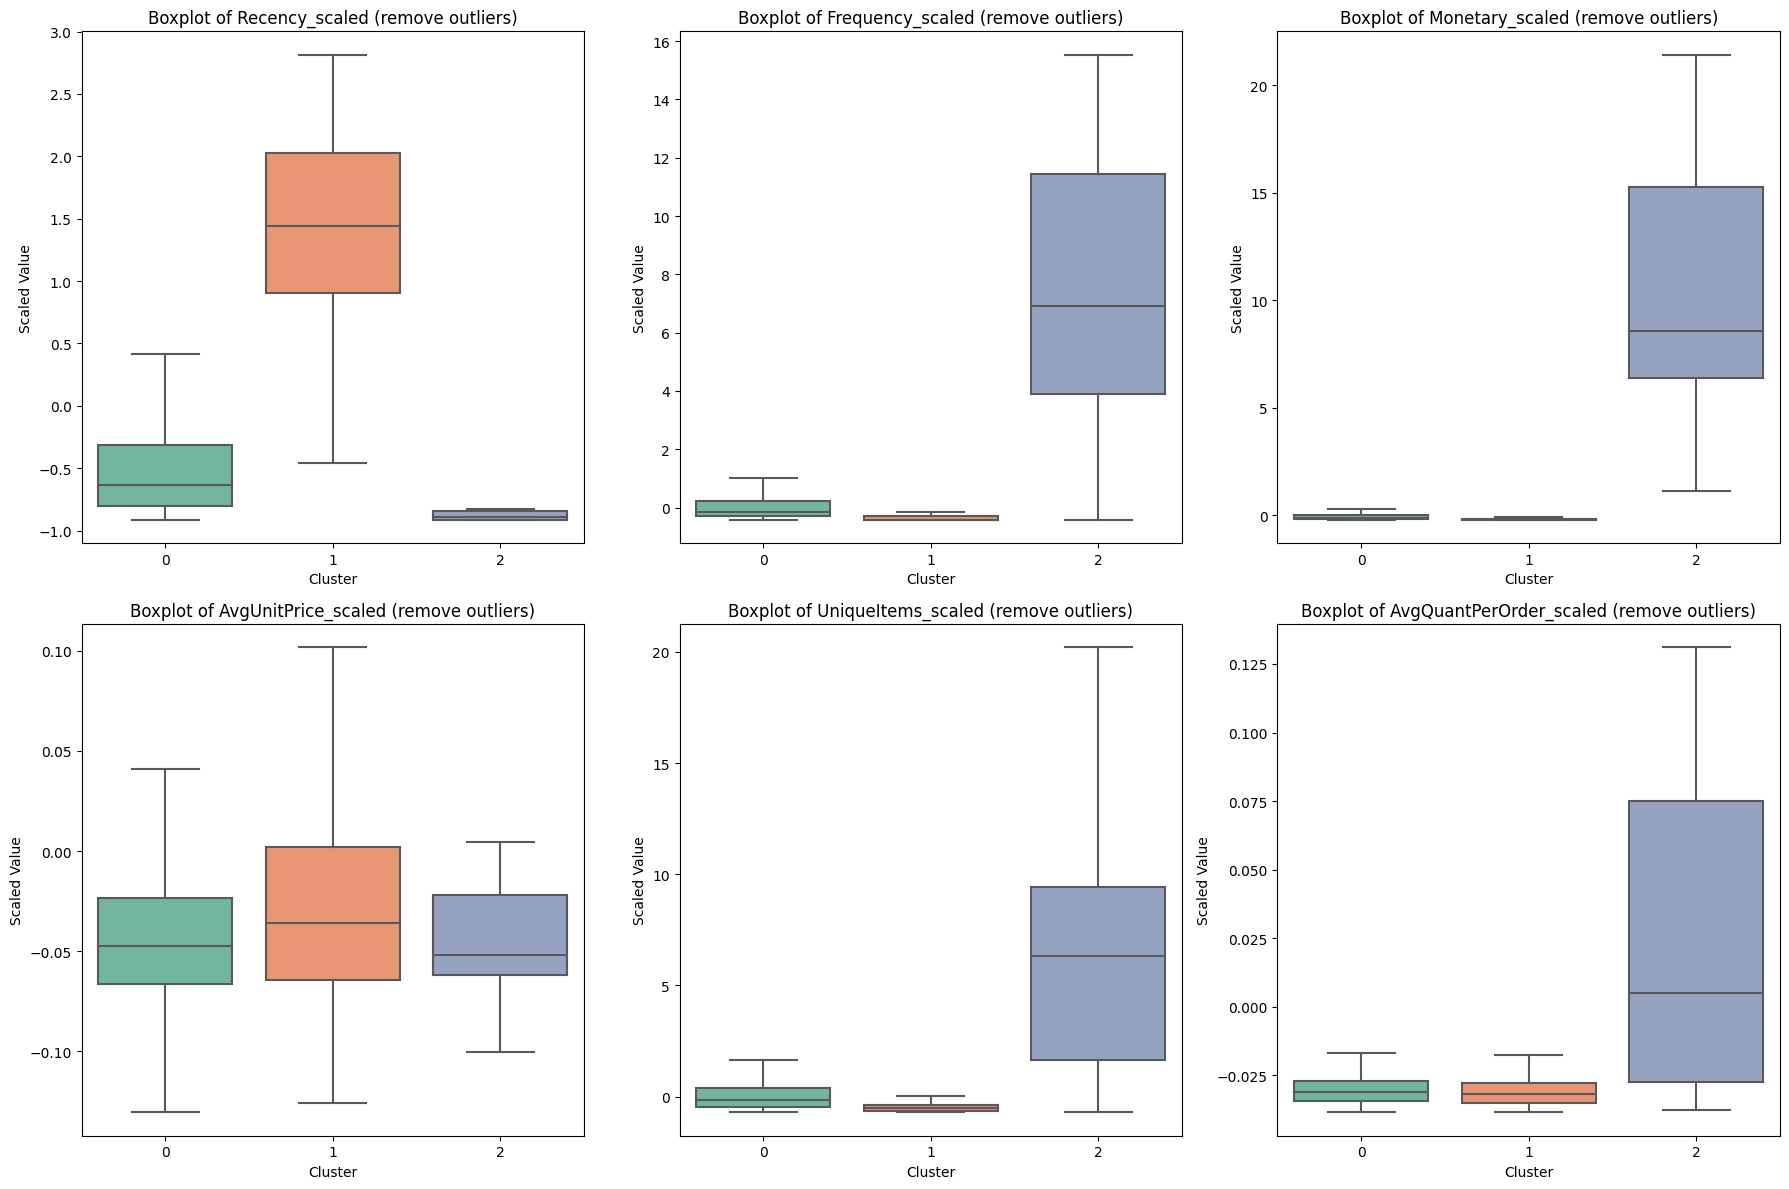

In [20]:
# 六種特徵（標準化後）
feature_cols = [
    'Recency_scaled',
    'Frequency_scaled',
    'Monetary_scaled',
    'AvgUnitPrice_scaled',
    'UniqueItems_scaled',
    'AvgQuantPerOrder_scaled'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=col, data=df_feat_scaled, palette='Set2', showfliers=False)
    plt.title(f'Boxplot of {col} (remove outliers)')
    plt.xlabel('Cluster')
    plt.ylabel('Scaled Value')

plt.tight_layout()
plt.show()

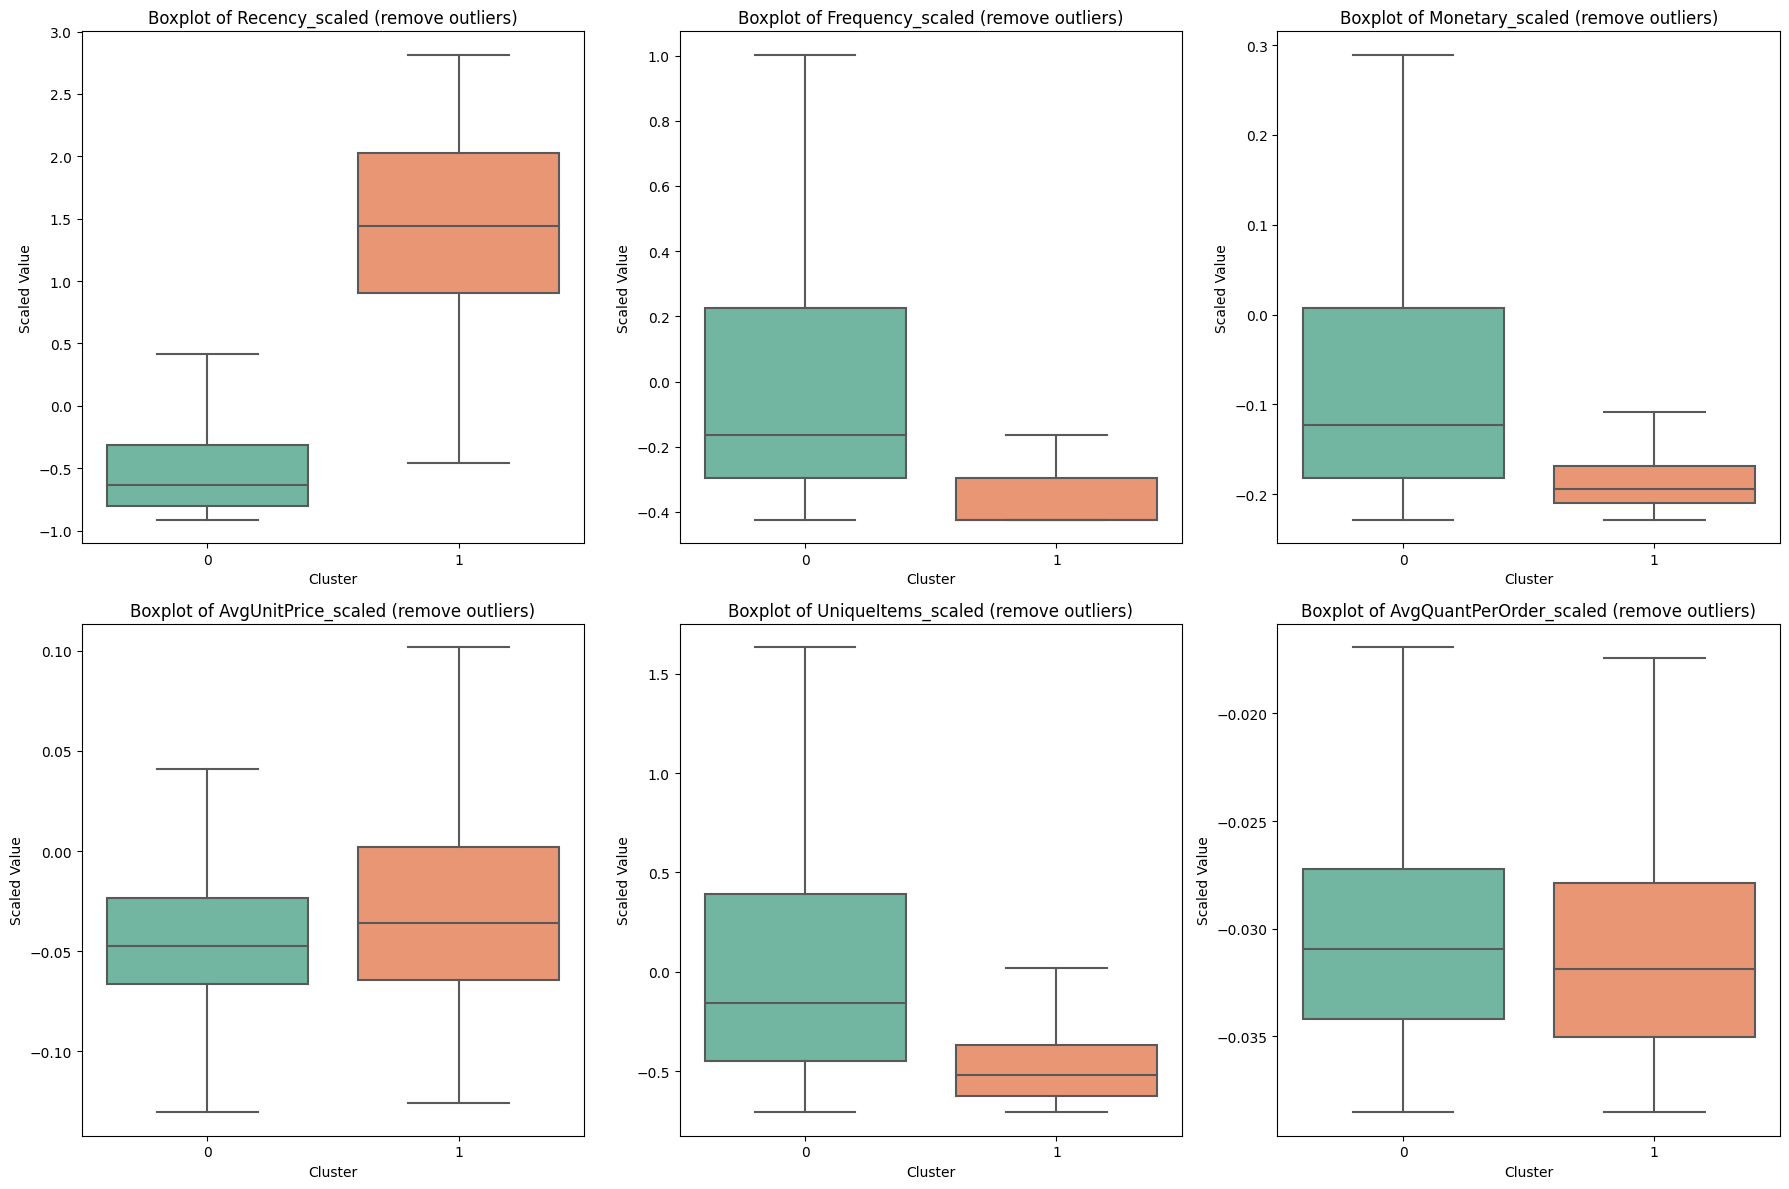

In [21]:
df_filtered = df_feat_scaled[df_feat_scaled['cluster'].isin([0, 1])]
plt.figure(figsize=(18, 12))

for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='cluster', y=col, data=df_filtered, palette='Set2', showfliers=False)
    plt.title(f'Boxplot of {col} (remove outliers)')
    plt.xlabel('Cluster')
    plt.ylabel('Scaled Value')

plt.tight_layout()
plt.show()

Cluster 0
<br>Recency：集中高於平均值，近期有購買
<br>Frequency：消費次數集中平均值且左偏
<br>Monetary： 金額略低於平均值且左偏
<br>AvgUnitPrice：3群無太大差異
<br>UniqueItems：集中於平均值
<br>AvgQuantPerOrder：略低於平均值且與cluster 1相近

<br> Cluster 1
<br>Recency：明顯高於其他兩群，久未購買
<br>Frequency：3群最低，交易頻率少
<br>Monetary：3群最低，消費金額小
<br>AvgUnitPrice：3群無太大差異
<br>UniqueItems：3群最低，購買品項少
<br>AvgQuantPerOrder：略低於平均值且與cluster 0相近

Cluster2
<br>Recency：3群最低，近期有購買
<br>Frequency：遠高2群，交易極頻繁
<br>Monetary：遠高2群，交易金額極大
<br>AvgUnitPrice：3群無太大差異
<br>UniqueItems：遠高2群，種類極多
<br>AvgQuantPerOrder：遠高2群，單筆大量採購


分群品質評估:
在標準化後的六維特徵上，K=3 的 Silhouette Score 達 0.470，顯示群內緊密且群間分離良好。三個群組的規模分布（3181、1140、18）符合客戶行為特性，亦具有明顯的商業語意。透過 boxplot，可以觀察到三群在消費金額、購買頻率、購買種類與平均訂購量等特徵上呈現清晰差異，代表群集具明確分界。綜合上述指標，K=3 的 K-means 為本資料具穩定性與可解釋性的最佳分群方案。